<a href="https://colab.research.google.com/github/mzaoualim/Coursera_IBM_Machine_Learning_Professional_Certificate/blob/main/supervised-machine-learning-classification/Project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#Modules imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
!pip install XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_auc_score


#Introduction

## Objective:

This is the Project-course of Coursera's 'Supervised Machine Learning: Classification'.

With the aim to use multiple classification algorithms to predict the Class value of the Target Variable.


##Data Source:

We'll be using an HR data-base provided in the 'Practice Lab: Modeling Imbalanced Classes'.

Consisted of multiples features of employees and a Target variable of the employee will or will not leave the company.

The task is to 'predict if an employee is looking for a new job or not'.

# EDA

In [2]:
#Loading the HR DATA
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML201EN-SkillsNetwork/labs/module_4/datasets/im_hr.csv", index_col=False)

In [3]:
#A Glimpse of the first 10 rows
data.head(10)

,city_development_index,training_hours,company_size,experience,relevent_experience,education_level,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,gender_Female,gender_Male,gender_Other,Class
0,0.920,61.0,3.0,15.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.802,156.0,3.0,15.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.920,126.0,2.0,21.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.910,50.0,4.0,10.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.913,42.0,0.0,21.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.910,37.0,3.0,9.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.698,64.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.682,336.0,3.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.550,55.0,2.0,15.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,0.920,30.0,7.0,21.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [4]:
#Data set
print('The Data set contains:\n', data.shape[0], ' lines.\n',
      data.shape[1], ' columns.\n')

print('The Data set features are:\n', data.columns.to_list())

The Data set contains:
 15781  lines.
 16  columns.

The Data set features are:
 ['city_development_index', 'training_hours', 'company_size', 'experience', 'relevent_experience', 'education_level', 'company_type_Early Stage Startup', 'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other', 'company_type_Public Sector', 'company_type_Pvt Ltd', 'gender_Female', 'gender_Male', 'gender_Other', 'Class']


In [5]:
#Descriptive Stats
data.describe()

,city_development_index,training_hours,company_size,experience,relevent_experience,education_level,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,gender_Female,gender_Male,gender_Other,Class
count,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000
mean,0.844824,66.004436,2.917686,10.581902,0.741651,2.134719,0.032507,0.057347,0.028135,0.006400,0.051137,0.824472,0.064128,0.925797,0.010075,0.088714
std,0.112675,60.703603,1.944152,6.799693,0.437741,0.701058,0.177349,0.232513,0.165364,0.079747,0.220285,0.380430,0.244988,0.262110,0.099873,0.284340
min,0.448000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.794000,23.000000,2.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,0.910000,47.000000,2.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.920000,89.000000,4.000000,16.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,0.949000,336.000000,7.000000,21.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#General information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15781 entries, 0 to 15780
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city_development_index            15781 non-null  float64
 1   training_hours                    15781 non-null  float64
 2   company_size                      15781 non-null  float64
 3   experience                        15781 non-null  float64
 4   relevent_experience               15781 non-null  float64
 5   education_level                   15781 non-null  float64
 6   company_type_Early Stage Startup  15781 non-null  float64
 7   company_type_Funded Startup       15781 non-null  float64
 8   company_type_NGO                  15781 non-null  float64
 9   company_type_Other                15781 non-null  float64
 10  company_type_Public Sector        15781 non-null  float64
 11  company_type_Pvt Ltd              15781 non-null  float64
 12  gend

In [7]:
#Correlation with the Class feature
Corr = data.corrwith(data.Class)
Corr

city_development_index             -0.236536
training_hours                     -0.005772
company_size                       -0.058667
experience                         -0.112020
relevent_experience                -0.084167
education_level                    -0.013863
company_type_Early Stage Startup    0.008155
company_type_Funded Startup        -0.034782
company_type_NGO                   -0.026132
company_type_Other                  0.000111
company_type_Public Sector         -0.009705
company_type_Pvt Ltd                0.034412
gender_Female                       0.009298
gender_Male                        -0.012002
gender_Other                        0.008691
Class                               1.000000
dtype: float64

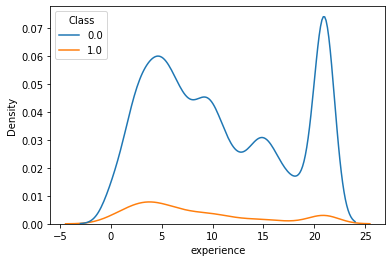

In [8]:
# Examples of feature distribution

sns.kdeplot(x=data['experience'],
            data=data,
            hue = 'Class')

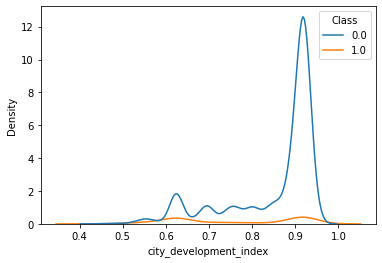

In [9]:
sns.kdeplot(x=data['city_development_index'],
            data=data,
            hue = 'Class')

#Feature Engineering

##Missing Data:

The data contains no missing, NaN or null values.

Which is great!

In [10]:
#NA check
data.isna().sum()

city_development_index              0
training_hours                      0
company_size                        0
experience                          0
relevent_experience                 0
education_level                     0
company_type_Early Stage Startup    0
company_type_Funded Startup         0
company_type_NGO                    0
company_type_Other                  0
company_type_Public Sector          0
company_type_Pvt Ltd                0
gender_Female                       0
gender_Male                         0
gender_Other                        0
Class                               0
dtype: int64

In [11]:
#NuLL check
data.isnull().sum()

city_development_index              0
training_hours                      0
company_size                        0
experience                          0
relevent_experience                 0
education_level                     0
company_type_Early Stage Startup    0
company_type_Funded Startup         0
company_type_NGO                    0
company_type_Other                  0
company_type_Public Sector          0
company_type_Pvt Ltd                0
gender_Female                       0
gender_Male                         0
gender_Other                        0
Class                               0
dtype: int64

## Training & Test set
Setting 20% testing set for our models

In [12]:
# Defining X
X = data.loc[:, data.columns != 'Class']
# Defining y
y = data['Class']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    stratify=y)

## Balancing Data

As presented below, we have an extremly unbalanced data set, with Class 1 representing less than .9% of the observations.

In [13]:
# Class ratios
data['Class'].value_counts(normalize=True)

0.0    0.911286
1.0    0.088714
Name: Class, dtype: float64

So to correct this skewness of data, we'll use the Synthetic Minority Oversampling Technique (SMOTE) algorithm in order to 'creates a class-balanced synthetic dataset without adding duplicated instances with minority labels'.

The SMOTE technique is implemented by `imblearn` as follow:


In [14]:
# Create a SMOTE sampler
smote_sampler = SMOTE(random_state = 42)

In [15]:
# Resample training data using SMOTE
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)

After SMOTE resampling, we can see both positive and negative class has the same instances


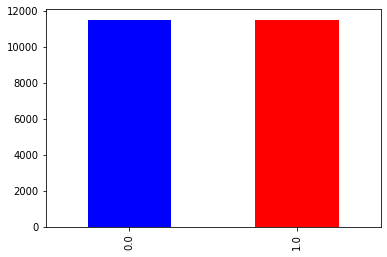

In [16]:
# Visualize classes
y_smo.value_counts().plot.bar(color=['blue', 'red'])

Data all set.

Let's go modeling!

# Model Selection

## Model 1: Logistic regression

In [128]:
#Suggested parameters to search
param_grid ={
    'penalty':('l1', 'l2'),
    'fit_intercept':(True, False),
    'solver':('liblinear', 'saga')
}

In [129]:
#GridSearch
grid_lr = GridSearchCV(LogisticRegression(),
                       param_grid=param_grid,
                       n_jobs=-1,
                       cv =10)

In [130]:
grid_lr.fit(X_smo, y_smo)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'fit_intercept': (True, False),
                         'penalty': ('l1', 'l2'),
                         'solver': ('liblinear', 'saga')})

In [131]:
#Best estimator
grid_lr.best_estimator_

LogisticRegression(solver='liblinear')

In [132]:
#Best score
grid_lr.best_score_

0.6970623358464184

In [133]:
#prediction
preds = grid_lr.predict(X_test)

In [134]:
#Detailed score
precision_lr, recall_lr, f_beta_lr, support_lr = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
auc_lr = roc_auc_score(y_test, preds)
accuracy_lr = accuracy_score(y_test, preds)
print(f"Accuracy is: {accuracy_lr:.2f}")
print(f"Precision is: {precision_lr:.2f}")
print(f"Recall is: {recall_lr:.2f}")
print(f"Fscore is: {f_beta_lr:.2f}")
print(f"AUC is: {auc_lr:.2f}")

Accuracy is: 0.71
Precision is: 0.16
Recall is: 0.53
Fscore is: 0.48
AUC is: 0.63


## Model 2: Decision Tree Classifier

In [138]:
#Suggested parameters to search
param_grid = {
    'criterion':('entropy', 'gini'),
    'max_depth': np.arange(5,15,1),
    'max_features':('sqrt', None),
}

In [139]:
#GridSearchCV
grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                       param_grid = param_grid,
                       n_jobs=-1,
                       cv = 10)

In [140]:
grid_dt.fit(X_smo, y_smo)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': ('sqrt', None)})

In [141]:
#Best etimator
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=14, random_state=42)

In [142]:
#Best score
grid_dt.best_score_

0.8760893373391532

In [143]:
#Predictions
preds = grid_dt.predict(X_test)

In [144]:
#Detailed score
precision_dt, recall_dt, f_beta_dt, support_dt = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
auc_dt = roc_auc_score(y_test, preds)
accuracy_dt = accuracy_score(y_test, preds)
print(f"Accuracy is: {accuracy_dt:.2f}")
print(f"Precision is: {precision_dt:.2f}")
print(f"Recall is: {recall_dt:.2f}")
print(f"Fscore is: {f_beta_dt:.2f}")
print(f"AUC is: {auc_dt:.2f}")

Accuracy is: 0.84
Precision is: 0.20
Recall is: 0.27
Fscore is: 0.27
AUC is: 0.58


## Model 3: XGBOOST Classifier

In [148]:
#Suggested parameters to search
param_grid = {
    'booster':['gbtree'], 
    'objective':['binary:logistic'],
    'learning_rate': np.arange(0,1,0.3), 
    'max_depth': [5, 10],
    'n_estimators': [30, 50],
    'seed': [42]
}

In [149]:
#GridSearch
grid_xgb = GridSearchCV(estimator= XGBClassifier(),
                        param_grid = param_grid,
                        n_jobs= -1,
                        cv= 10)

In [150]:
grid_xgb.fit(X_smo, y_smo)

GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'booster': ['gbtree'],
                         'learning_rate': array([0. , 0.3, 0.6, 0.9]),
                         'max_depth': [5, 10], 'n_estimators': [30, 50],
                         'objective': ['binary:logistic'], 'seed': [42]})

In [72]:
#Best estimator
grid_xgb.best_estimator_

XGBClassifier(learning_rate=0.3, max_depth=10, n_estimators=50, seed=42)

In [151]:
#Best score
grid_xgb.best_score_

0.9345481170757516

In [152]:
#Prediction
preds = grid_xgb.predict(X_test)

In [153]:
#Detailed Score
precision_xgbc, recall_xgbc, f_beta_xgbc, support_xgbc = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
auc_xgbc = roc_auc_score(y_test, preds)
accuracy_xgbc = accuracy_score(y_test, preds)
print(f"Accuracy is: {accuracy_xgbc:.2f}")
print(f"Precision is: {precision_xgbc:.2f}")
print(f"Recall is: {recall_xgbc:.2f}")
print(f"Fscore is: {f_beta_xgbc:.2f}")
print(f"AUC is: {auc_xgbc:.2f}")

Accuracy is: 0.89
Precision is: 0.26
Recall is: 0.11
Fscore is: 0.11
AUC is: 0.54


# Data Analytics

## Best Model

In [154]:
#Score table
Results = pd.DataFrame(columns= ['Scores', 'Logistic Regression', 'Decision Tree Classifier', 'XGBOOST Classifier'])
Results['Scores'] = ['Accuracy', 'Precision', 'recall', 'F1 Score', 'AUC']
Results['Logistic Regression'] = [accuracy_lr, precision_lr, recall_lr, f_beta_lr, auc_lr]
Results['Decision Tree Classifier'] = [accuracy_dt, precision_dt, recall_dt, f_beta_dt, auc_dt]
Results['XGBOOST Classifier'] = [accuracy_xgbc, precision_xgbc, recall_xgbc, f_beta_xgbc, auc_xgbc]

In [155]:
Results.set_index('Scores')

,Logistic Regression,Decision Tree Classifier,XGBOOST Classifier
Scores,,,
Accuracy,0.712702,0.837821,0.892620
Precision,0.159609,0.197917,0.256198
recall,0.525000,0.271429,0.110714
F1 Score,0.482515,0.267606,0.113186
AUC,0.627985,0.582186,0.539716


While all models do have good accuracy, but recall remains low due to difficulty to predict minority Class, except for Logistic Regression with a .52 recall score.

For our task, we stick with Logistic Regression model as our best model.

The low Precision score is a side effect of SMOTE algorithms and a result of hight predicted false positive in the test set.

## Feature Importance

city_development_index: 0, Score: -6.60666
training_hours: 1, Score: 0.00050
company_size: 2, Score: -0.16540
experience: 3, Score: -0.00920
relevent_experience: 4, Score: -0.58141
education_level: 5, Score: 0.11670
company_type_Early Stage Startup: 6, Score: 0.22019
company_type_Funded Startup: 7, Score: 0.13606
company_type_NGO: 8, Score: 0.18209
company_type_Other: 9, Score: 1.51993
company_type_Public Sector: 10, Score: 0.80561
company_type_Pvt Ltd: 11, Score: 1.05014
gender_Female: 12, Score: 1.24212
gender_Male: 13, Score: 1.09890
gender_Other: 14, Score: 1.57299


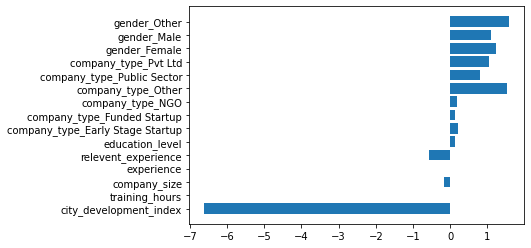

In [167]:
# Retrieve feature importance
importance = grid_lr.best_estimator_.coef_[0]

# summarize feature importance
for c, (i,v) in zip(X.columns.to_list(), enumerate(importance)):
  print('%s: %0d, Score: %.5f' % (c,i,v))

# plot feature importance
plt.barh([x for x in X.columns.to_list()], importance, )
plt.show()

We can conclude that, the main driver of leaving and looking for a new position is the low dev city, followed by experience and company type and size.

In an other words, low developped cities and reduced experience are the main cause of high turnover in work place, especially in startup and medium size private owned companies.

#Conclusion

In this project, we observe:


*   The difficulty of predicting a minority class in imbalanced data set.
*   The trade-off in Precision and Recall is necessary to increase model robustess.

In other hand, modeling imbalanced data set can be achieved better with:


*   Multiple balancing techniques other than SMOTE.
*   Multiple robuste emsemble models like Random Forest.

Thanks for reading and hope to [hear](mailto:mohamed.mzaouali@gmail.com) from you soon.


